In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as pyplot
from PIL import Image
import matplotlib.cm as cm
from pprint import pprint
import scipy.misc
import PIL
import KMeansUtilities as km

In [2]:
def is_background(mat,colno):
    row,col=mat.shape
    for i in range(0,row):
        if mat[i][colno]<0.2:
            return False
    return True

In [3]:
def get_next_nonbackground(mat,colno):
    row,col=mat.shape
    for i in range(colno+1,col):
        if is_background(mat,i)==False:
            return i
    return col-1

In [4]:
def get_words(mat,threshold):
    divs=[]
    divs.append(0)
    row,col=mat.shape
    for i in range(col):
        if is_background(mat,i)==False:
            next_bac=get_next_nonbackground(mat,i)
            if next_bac-i>threshold:
                divs.append(i)
                divs.append(next_bac)
                i=next_bac
    divs.append(col-1)
    return divs
def get_threshold(mat):
    diff_mat=[]
    row,col=mat.shape
    i=0
    while i<col:
        if is_background(mat,i)==True:
            next_bac=get_next_nonbackground(mat,i)
            diff_mat.append([next_bac-i])
            i=next_bac
        i+=1
    return diff_mat
        

/home/diwas/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


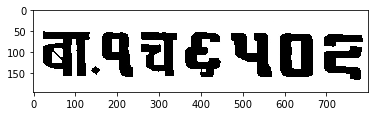

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


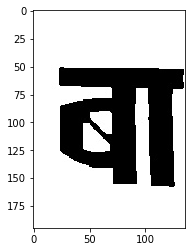

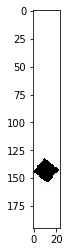

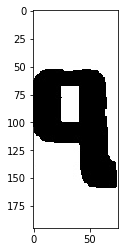

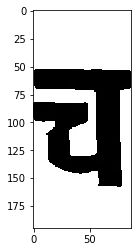

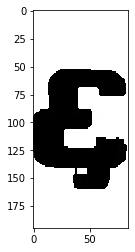

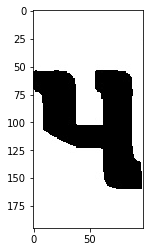

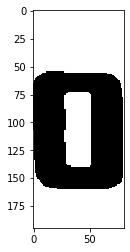

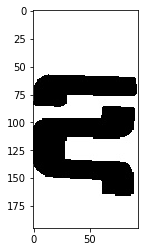

In [5]:

img=scipy.misc.imread('b.jpg')

#img=img[:,:,1]
img=img/255.0
pyplot.imshow(img,cmap=cm.gray)
pyplot.show()

g=get_threshold(img)

f=km.get_clusters(g,2)

mini=999999
for i in f[1]:
    if i[0] <mini:
        mini=i[0]

d=get_words(img,mini-1)
words=[]
for i in range(0,len(d)-1,2):
    if d[i+1]-d[i]>0:
        words.append(img[:,d[i]:d[i+1]+2])
        
from keras.models import load_model
model = load_model('model.h5')

for i in words:
    
    pyplot.imshow(i,cmap=cm.gray)
    pyplot.show()
   
    
     
